In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("heart.csv")

# Attribute Information:

    Age
    Sex = ['Male','Female']
    Chest pain type (4 values) = ["Asymptomatic", "Atypical angina", "No angina", "Typical angina"]
    Resting blood pressure
    serum cholestoral in mg/dl
    fasting blood sugar > 120 mg/dl = ["No", "Yes"]
    resting electrocardiographic results (values 0,1,2) = ["Hypertrophy", "Normal", "Abnormalities"]
    maximum heart rate achieved
    exercise induced angina
    oldpeak = ST depression induced by exercise relative to rest
    the slope of the peak exercise ST segment (values 0,1,2) = ["upsloping","flat","downsloping"]
    number of major vessels (0-3) colored by flourosopy
    thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data['target'].unique()

array([1, 0], dtype=int64)

In [8]:
data.target.value_counts()

1    164
0    138
Name: target, dtype: int64

In [9]:
data.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data.rename(columns={"cp": "chest_pain_type", "trestbps": "resting_bp", "restecg": "resting_electrocardio_results",
                  "thalach": "max_heart_rate", "oldpeak":"ST_depression"},inplace=True)

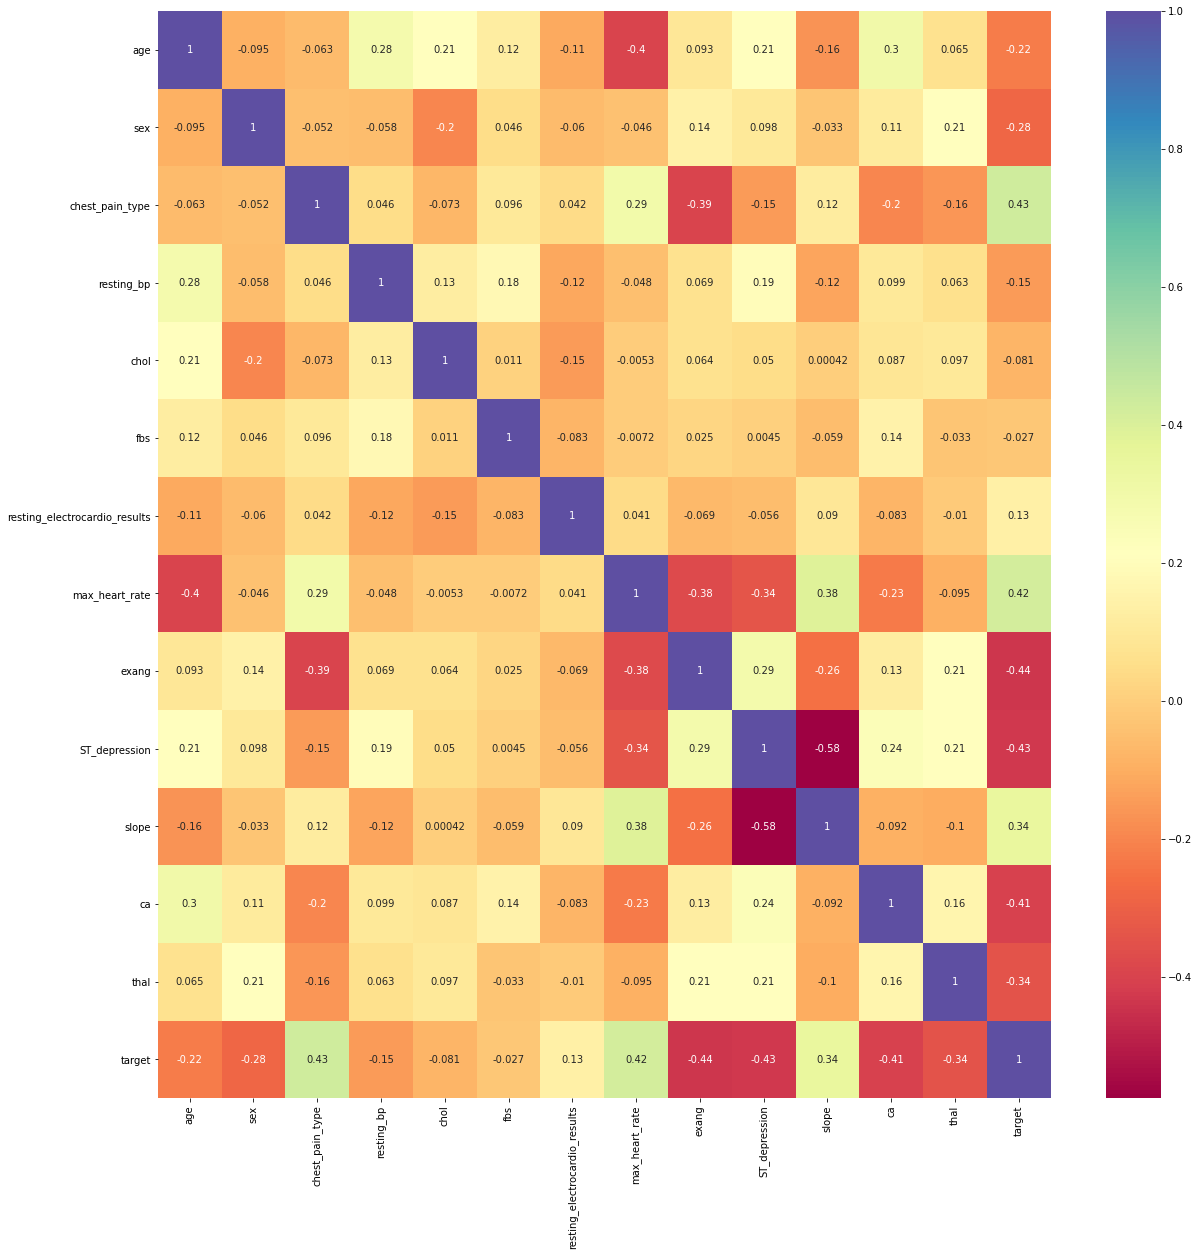

In [12]:
corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='Spectral')
plt.show()

We can see that cp(chest pain), thalach(max heart rate achieved),
slope are correlated with target i.e higher these values higher the chances of getting the heart disease

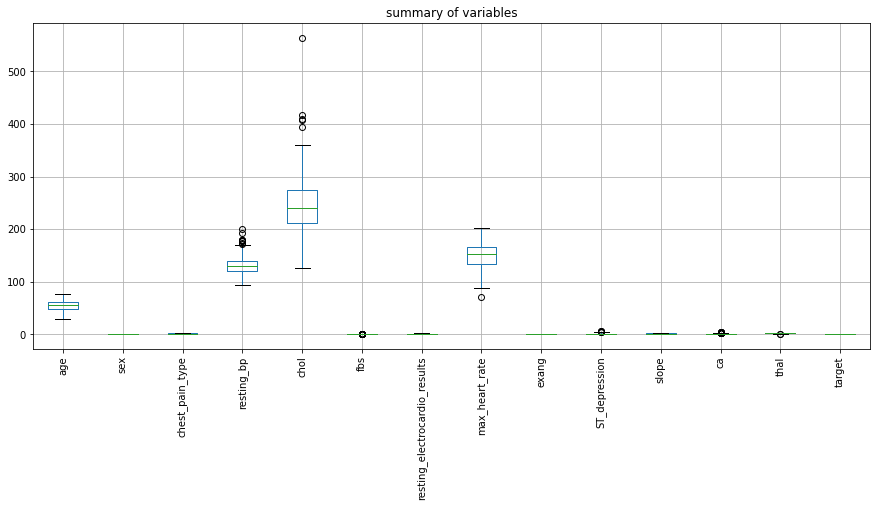

In [13]:
plt.figure(figsize=(15,6))
plt.title('summary of variables')
data.boxplot()
plt.xticks(rotation=90)
plt.show()

We can see from the boxplot there are some outliers in resting_bp, chol,fbs, max_heart_rate, ST_depression,ca and thal.

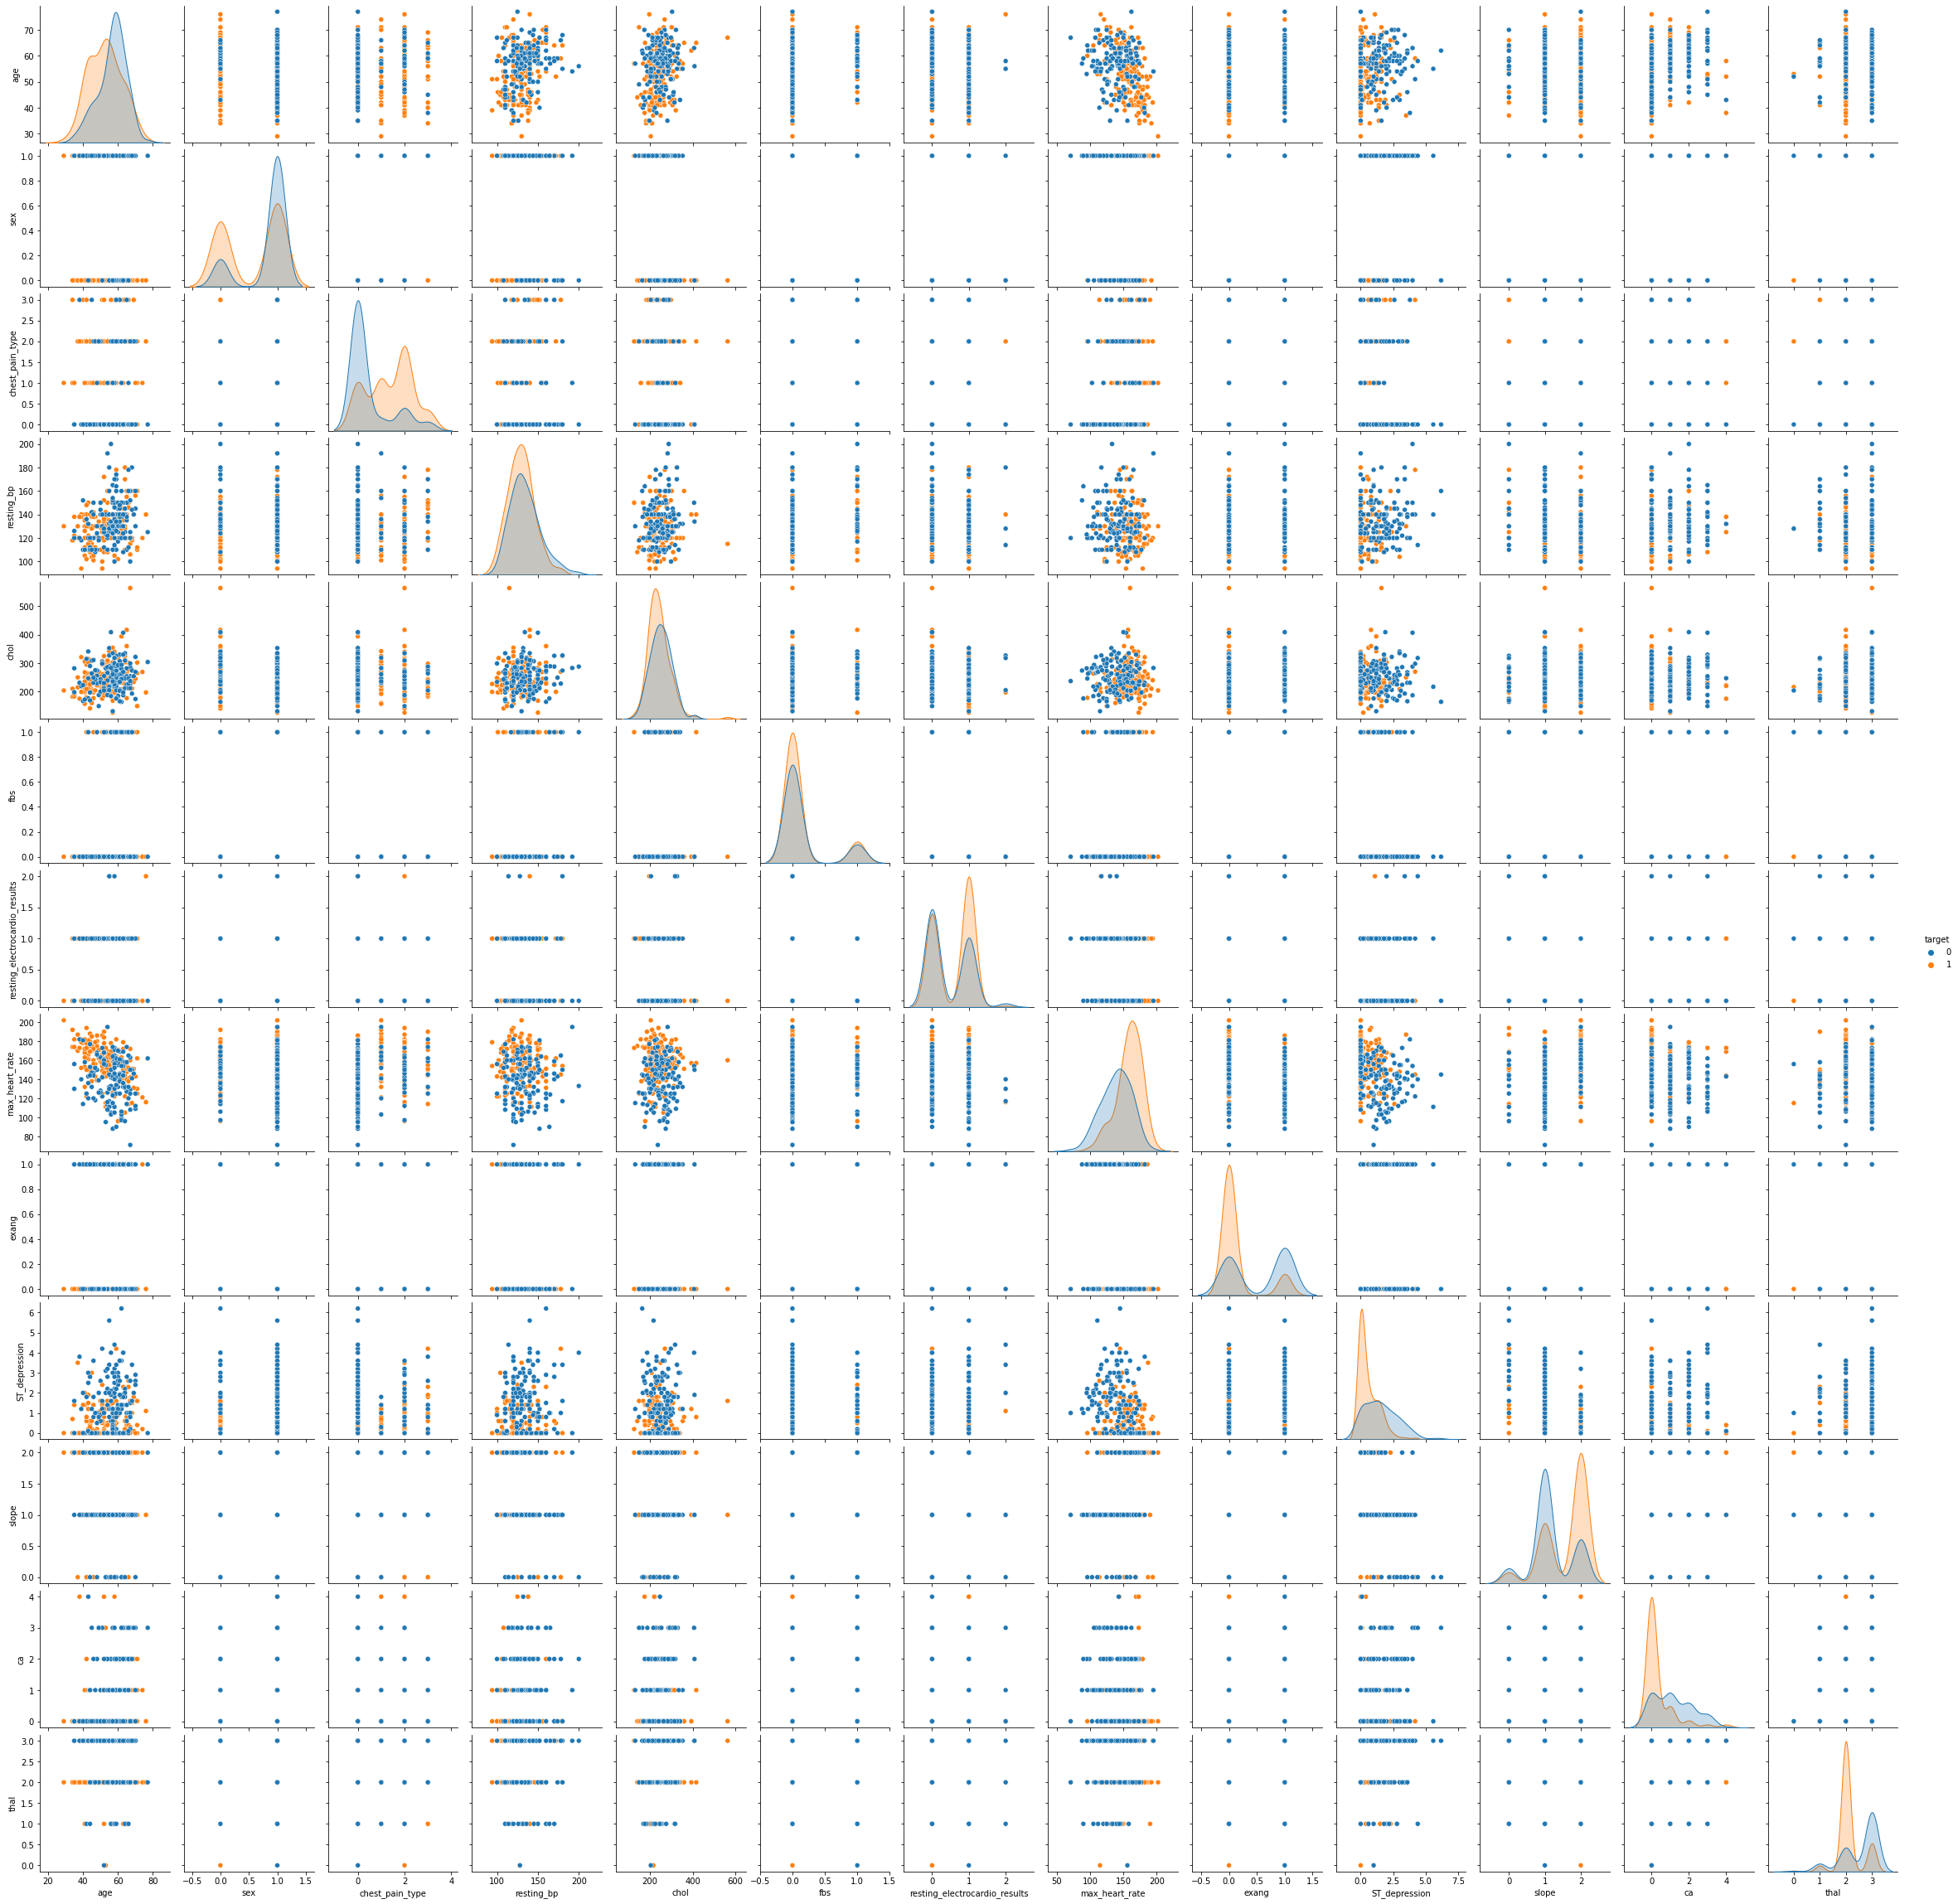

In [14]:
sns.pairplot(data = data,hue = 'target')

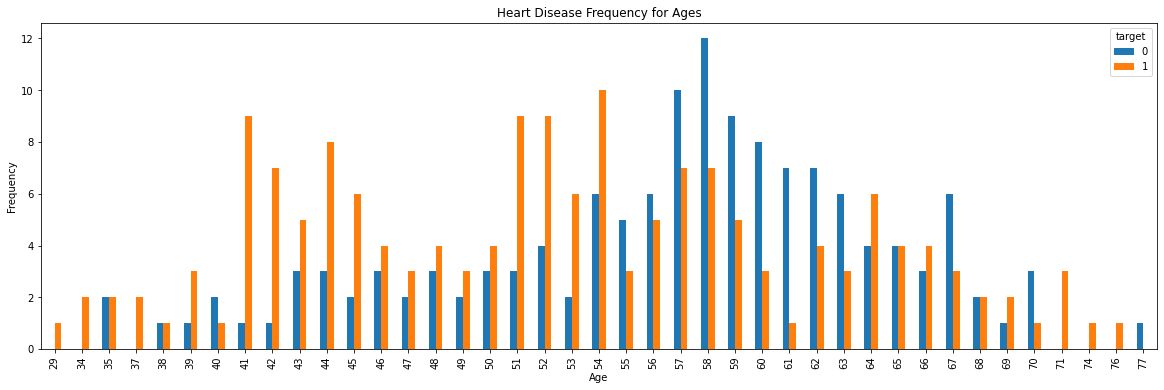

In [15]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

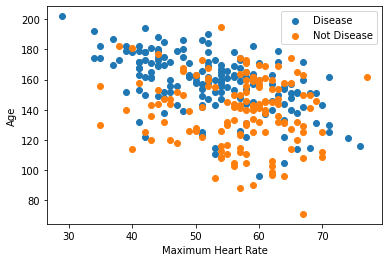

In [16]:
plt.scatter(x=data.age[data.target==1], y=data['max_heart_rate'][(data.target==1)])
plt.scatter(x=data.age[data.target==0], y=data['max_heart_rate'][(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Age")
plt.show()

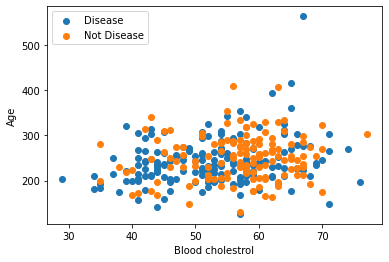

In [17]:
plt.scatter(x=data.age[data.target==1], y=data['chol'][(data.target==1)])
plt.scatter(x=data.age[data.target==0], y=data['chol'][(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Blood cholestrol")
plt.ylabel("Age")
plt.show()

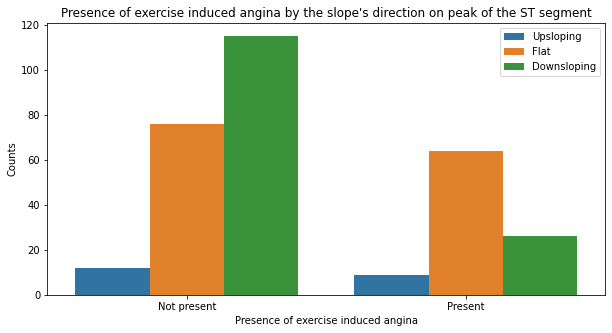

In [18]:
plt.figure(figsize=(10, 5))
g = sns.countplot("exang", hue="slope", data=data)
g.set_xticklabels(["Not present", "Present"])
plt.title("Presence of exercise induced angina by the slope's direction on peak of the ST segment")
plt.xlabel("Presence of exercise induced angina")
plt.ylabel("Counts")
plt.legend(["Upsloping", "Flat", "Downsloping"])
plt.show() 

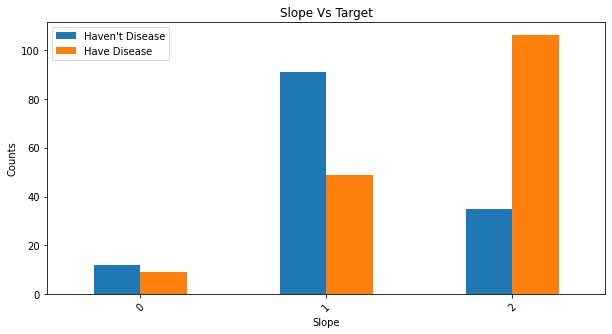

In [19]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(10,5))
plt.title('Slope Vs Target')
plt.xlabel('Slope')
plt.xticks(rotation = 45)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Counts')
plt.show()

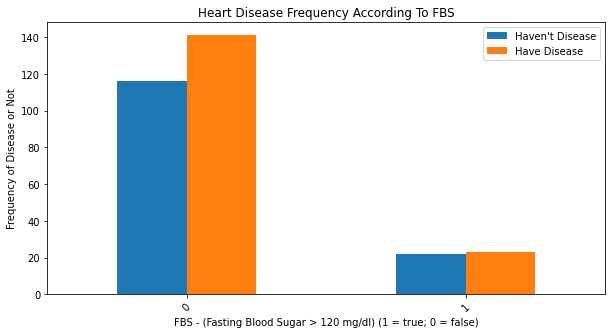

In [20]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(10,5))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 45)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

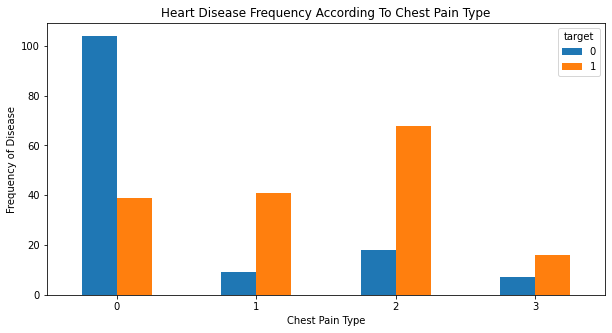

In [21]:
pd.crosstab(data.chest_pain_type,data.target).plot(kind="bar",figsize=(10,5))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease')
plt.show()

For a healthy person, asymptotic type of chest pain type is favourable

<AxesSubplot:xlabel='age', ylabel='Density'>

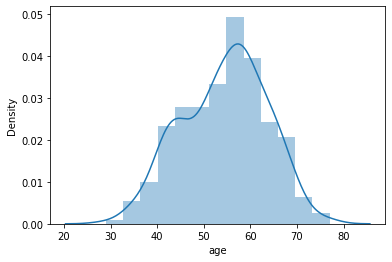

In [22]:
sns.distplot(data['age'])

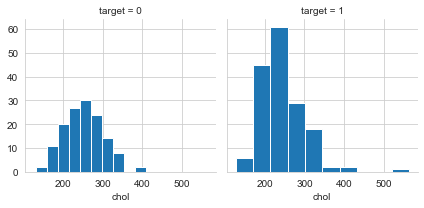

In [23]:

sns.set_style('whitegrid')
g = sns.FacetGrid(data,col='target')
g.map(plt.hist,'chol')



## Scaling The Features

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'resting_bp', 'chol', 'max_heart_rate', 'ST_depression']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [26]:
scaling = pd.to_pickle(standardScaler,"scale.pkl")

In [27]:
data.head()

,age,sex,chest_pain_type,resting_bp,chol,fbs,resting_electrocardio_results,max_heart_rate,exang,ST_depression,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [28]:
X = data.drop('target',axis=1).values
y = data['target'].values
score = []

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(X_train,y_train)
pred1 = clf1.predict(X_test)


In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
scr1 = accuracy_score(y_test,pred1)
print(scr1)
score.append(scr1)

0.8688524590163934


In [32]:
print(confusion_matrix(y_test,pred1))

[[22  5]
 [ 3 31]]


In [33]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



## SVC

In [34]:
from sklearn.svm import SVC
clf2 = SVC()
clf2.fit(X_train, y_train)
pred2 = clf2.predict(X_test)
scr2 = accuracy_score(y_test,pred2)
print(scr2)
score.append(scr2)

0.8852459016393442


In [35]:
print(confusion_matrix(y_test,pred2))

[[22  5]
 [ 2 32]]


In [36]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        27
           1       0.86      0.94      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



## KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i) 
    scoree = cross_val_score(knn,X,y,cv = 10)
    error_rate.append(1 - scoree.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

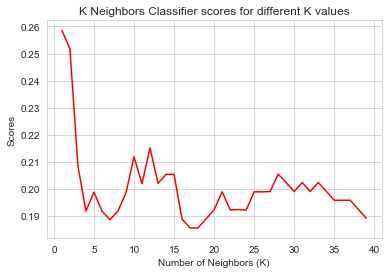

In [38]:
plt.plot([k for k in range(1, 40)], error_rate, color = 'red')

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [39]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
pred3 = knn.predict(X_test)
print(accuracy_score(y_test, pred3))
print('confusion_matrix\n', confusion_matrix(y_test,pred3))
print('\n')
print('classification_report\n' ,classification_report(y_test,pred3))

    

0.8688524590163934
confusion_matrix
 [[22  5]
 [ 3 31]]


classification_report
               precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [40]:
from sklearn.model_selection import GridSearchCV
knn_params = {'n_neighbors': list(range(3, 20, 2)),
          'weights':['uniform', 'distance'],
          'metric':['euclidean', 'manhattan']}
grid_search = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='accuracy', cv=10, n_jobs=-1) 
grid_search=grid_search.fit(X_train, y_train)
print(grid_search.best_params_ )


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [41]:
clf3 = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 15, weights= 'distance')
clf3.fit(X_train, y_train)
pred = clf3.predict(X_test)
scr3 = accuracy_score(y_test,pred)
score.append(scr3)
print(scr3)
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

0.9016393442622951
[[23  4]
 [ 2 32]]


              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



## Decision Tree 

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
clf4 = DecisionTreeClassifier()
clf4.fit(X_train, y_train)
pred4 = clf2.predict(X_test)
scr4 = accuracy_score(y_test,pred4)
print(scr4)
score.append(scr4)

0.8852459016393442


## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
max_accuracy = 0
for x in range(100):
    rf = RandomForestClassifier(n_estimators = 100,random_state=x)
    rf.fit(X_train,y_train)
    pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
clf5 = RandomForestClassifier(n_estimators = 100,random_state=best_x)
clf5.fit(X_train,y_train)
pred5 = clf5.predict(X_test)

90.16


In [46]:
score.append(max_accuracy)

In [47]:
print(confusion_matrix(y_test,pred5))

[[24  3]
 [ 3 31]]


In [48]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [49]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
criterion = ['gini','entropy']
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                               scoring='accuracy',
                              n_iter=10,cv=5,verbose=0,random_state=42,n_jobs=-1)

rf_random.fit(X_train,y_train)
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [50]:
classifier = RandomForestClassifier(n_estimators=200, min_samples_split=10,min_samples_leaf=2,max_features='sqrt',
 max_depth=50,bootstrap = True)
classifier.fit(X_train,y_train)
y_pred =classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

0.8852459016393442
[[23  4]
 [ 3 31]]


              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [51]:
name = ["Logistic Regression","SVC","KNN","Decision Tree Classifier","Random Forest"]

In [52]:
algo = zip(name,score)

In [53]:
for i,j in algo:
    print("The Score for ",i,"is",j)

The Score for  Logistic Regression is 0.8688524590163934
The Score for  SVC is 0.8852459016393442
The Score for  KNN is 0.9016393442622951
The Score for  Decision Tree Classifier is 0.8852459016393442
The Score for  Random Forest is 90.16


In [54]:
model = pd.to_pickle(clf5,'model.pkl')

In [55]:
result = clf5.predict([[55,1,0,140,217,0,1,111,1,5.6,0,0,3]])
result


array([0], dtype=int64)